In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt

# Energy cut

For a better understanding of the energy cut, two toy function will be called. The first one gives a upper and the second one a lower kinematic integration limit for the differential crosssections.

In [2]:
def calculate_vmax(energy):
    shift, smooth = 1e3, 1e-5
    return np.tanh(smooth*(energy- shift)) 

def calculate_vmin(energy):
    return np.minimum([1e-5]*len(energy),calculate_vmax(energy))

An absoult $e_{cut}$ and a relativ $v_{cut}$ energy cut can be set two slice the differential crosssection in a part which can be handeled continuously and stochastically. 
In general the $cut$ as a function of energy $E$ can be calculated solving the equation 
$$
cut = \min \left( e_{cut} / E, v_{cut} \right)
$$

This section is limited by the theoretical limits of the effective cross section. Taken this into account a cut get the form like
$$
cut' = \min(v_{max}, \max(v_{min}, cut))
$$

In [4]:
cut = pp.EnergyCutSettings(500,0.05,False)

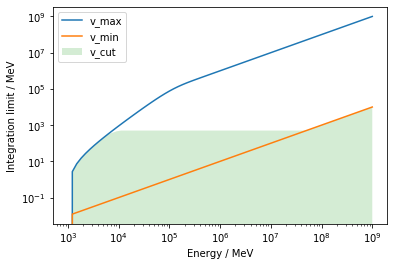

In [24]:
N_SAMPLE = 70
energies = np.geomspace(1e3, 1e9, 70)

vmax = calculate_vmax(energies)
vmin = calculate_vmin(energies)
cuts = np.empty(N_SAMPLE)

for i in range(N_SAMPLE):
    cuts[i] = cut.cut((vmin[i],vmax[i]), energies[i])
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(energies, energies*vmax, label="v_max")
ax.plot(energies, energies*vmin, label="v_min")
zeros = np.zeros(N_SAMPLE)
cut_energies = cuts*energies
ax.fill_between(energies, cut_energies, zeros, where=(cut_energies > zeros), facecolor='C2', alpha=0.2, label="v_cut")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Integration limit / MeV")
plt.xlabel("Energy / MeV")
plt.legend()